In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### <b>Objetivo del problema</b>

Utilizar Clustering para organizar a la población en grupos y después usar esos clusters para ver cuáles de ellos componen el mayor grupo de compradores/ usuarios para la empresa.

In [2]:
datadir = "data"
germ_pop_dir = os.path.join(datadir, "azdias.csv")
cust_pop_dir = os.path.join(datadir, "customers.csv")
featsum_dir = os.path.join(datadir, "feature_sum.csv")

In [3]:
gpop = pd.read_csv(germ_pop_dir, sep=";")
cpop = pd.read_csv(cust_pop_dir,sep=";")
featsum = pd.read_csv(featsum_dir, sep=";")

In [4]:
print("Information Levels:")
for ilev in featsum["information_level"].unique().tolist():
      print(f"- {ilev.capitalize()}")

Information Levels:
- Person
- Household
- Building
- Microcell_rr4
- Microcell_rr3
- Postcode
- Region_rr1
- Macrocell_plz8
- Community


In [5]:
def apply_nan(dataset):
    """Replace missing values with NaNs"""
    
    atts = featsum.attribute.values
    miss_codes = featsum.missing_or_unknown.values
    exc_str = {"[-1,XX]":"[-1,'XX']", "[-1,X]":"[-1,'X']", "[XX]":"['XX']"}
    
    for att, mcodes in zip(atts, miss_codes):
        if att and mcodes:
            
            if mcodes in exc_str.keys():
                mcodes = exc_str[mcodes]
            
            mcodes_ = eval(mcodes)
            for co in mcodes_:
                dataset[att] = dataset[att].replace(co, np.nan)
                
    return dataset

# Apply missing values treatment to datasets
gpop = apply_nan(gpop)
cpop = apply_nan(cpop)

### Steps for Exploratory Data Analysis.

##### Missing Values
1. Identificación de features con valores nulos
2. Distribución de nulos en features
3. ¿Por qué hay nulos?
4. Métodos de subsanación de nulos

##### Identificación de tipos de datos para todas las variables
1. Crear mapeo - feature: tipo de dato
2. Identificar cantidad de datos categóricos (y cantidad de clases) y numéricos

##### Estadísticos del dataset
1. Calcular media y varianza de features numéricas y moda para categóricos

##### Correlación de variables
1. Calcular la correlación entre variables
2. Mostrar correlación en correlation matrix

##### Aplicar transformación de variables
1. Normalización de variables, Codificación, Estandarización.
2. Aplicar método de reducción de dimensionalidad
3. Verificar eficacia del método *investigar*

Top features with missing values
--------------------------------------------------------------------------------
TITEL_KZ  - 99.76% of total dataset rows
AGER_TYP  - 76.96% of total dataset rows
KK_KUNDENTYP  - 65.60000000000001% of total dataset rows
KBA05_BAUMAX  - 53.47% of total dataset rows
GEBURTSJAHR  - 44.019999999999996% of total dataset rows


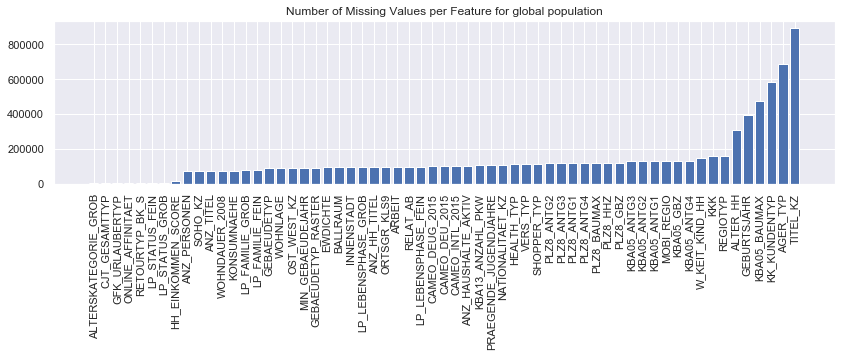

Top features with missing values
--------------------------------------------------------------------------------
TITEL_KZ  - 98.79% of total dataset rows
KK_KUNDENTYP  - 58.41% of total dataset rows
KBA05_BAUMAX  - 57.15% of total dataset rows
AGER_TYP  - 50.480000000000004% of total dataset rows
GEBURTSJAHR  - 48.54% of total dataset rows


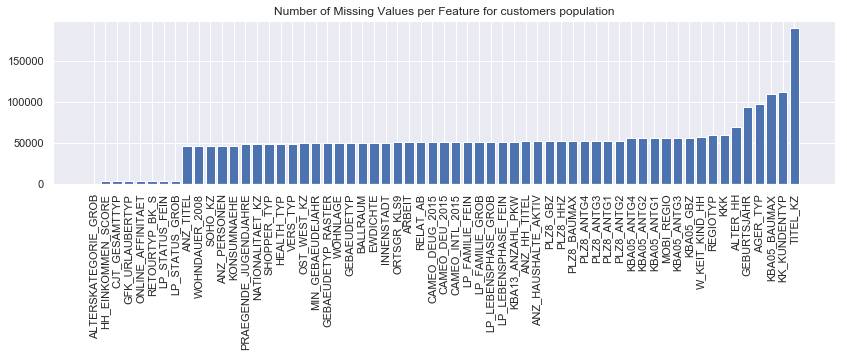

In [6]:
def show_missing_values(dataset, title, thres):
    """Function to plot missing values from the dataset"""
    
    mv = dataset.isna().sum()
    mv_only = mv[mv > 0].sort_values().to_dict()
    col_names, missing_values = list(mv_only.keys()), list(mv_only.values())
    
    # Show top features with missing values
    total_rows = dataset.shape[0]
    ordered = [(col, (val/total_rows)) 
               for val, col in sorted(zip(missing_values, col_names), reverse=True)
              if val/total_rows > thres]
    
    print("Top features with missing values")
    print("----"*20)
    for elem in ordered:
        print(f"{elem[0]}  - {np.round(elem[1], 4)*100}% of total dataset rows")
            
    sns.set()
    plt.figure(figsize=[14, 3])
    plt.bar(col_names, missing_values)
    plt.xticks(rotation=90)
    plt.title(title)
    
    plt.show()

show_missing_values(gpop, "Number of Missing Values per Feature for global population", 0.4)
show_missing_values(cpop, "Number of Missing Values per Feature for customers population", 0.4)

#### Why those features have so many null values?
Variables summary:
- TITEL_KZ : Academic title flag (unknown/ Dr. Prof., etc)
- KK_KUNDENTYP : Consumer pattern over past 12 months
- KBA05_BAUMAX : Most common building type within the microcell
- AGER_TYP : Best-ager typology



Top features with missing values
--------------------------------------------------------------------------------


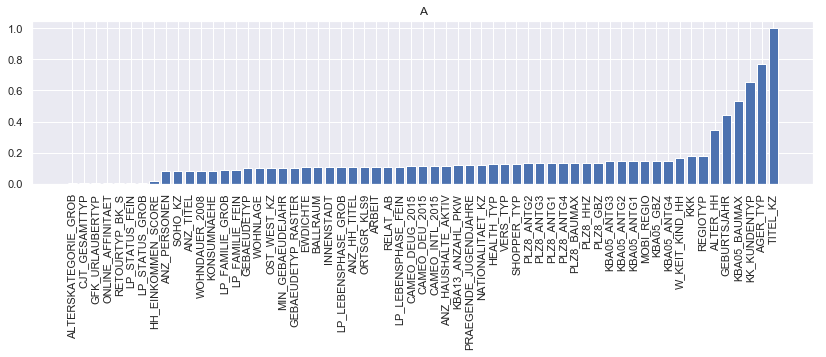

In [10]:
def show_missing_values(dataset, title, thres):
    """Function to plot missing values from the dataset"""
    total_rows = dataset.shape[0]
    mv = dataset.isna().sum()
    mv_only = mv[mv > 0].sort_values().to_dict()
    col_names, missing_values = list(mv_only.keys()), [e/total_rows for e in list(mv_only.values())]   
    # Show top features with missing values
   
    ordered = [(col, (val/total_rows)) 
               for val, col in sorted(zip(missing_values, col_names), reverse=True)
              if val/total_rows > thres]
    
    print("Top features with missing values")
    print("----"*20)
    for elem in ordered:
        print(f"{elem[0]}  - {np.round(elem[1], 4)*100}% of total dataset rows")
            
    sns.set()
    plt.figure(figsize=[14, 3])
    plt.bar(col_names, missing_values)
    plt.xticks(rotation=90)
    plt.title(title)
    
    plt.show()

show_missing_values(gpop, "A", 0.4)